## Importing Libraries

In [80]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Dataset

In [81]:
df = pd.read_csv('iris.csv') #Load the dataset

In [82]:
df.head() #Print the first 5 rows of the dataframe.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
df.columns = df.columns.str.lower() #Convert all the columns to lowercase
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df.describe().round() #Get the summary of the dataframe.

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.0,150.0,150.0,150.0,150.0
mean,76.0,6.0,3.0,4.0,1.0
std,43.0,1.0,0.0,2.0,1.0
min,1.0,4.0,2.0,1.0,0.0
25%,38.0,5.0,3.0,2.0,0.0
50%,76.0,6.0,3.0,4.0,1.0
75%,113.0,6.0,3.0,5.0,2.0
max,150.0,8.0,4.0,7.0,2.0


In [85]:
df.isnull().sum() #Check for missing values

id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [86]:
df.duplicated().sum() #Check for duplicate values 

0

In [87]:
df.corr(numeric_only=True) #Get the correlation between numeric variables

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepallengthcm,0.716676,1.000000,-0.109369,0.871754,0.817954
sepalwidthcm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petallengthcm,0.882747,0.871754,-0.420516,1.000000,0.962757
petalwidthcm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [88]:
df.drop('id',axis=1,inplace=True) #Drop the id column as it is not required for analysis

## Exploratory Data Analysis

### Bar Plot
Bar plot is used to show the distribution of a categorical variable in the form of rectangular bars, each bar having width and height proportional to the values that they represent. The bars can be plotted vertically or horizontally.

<Axes: xlabel='species', ylabel='sepallengthcm'>

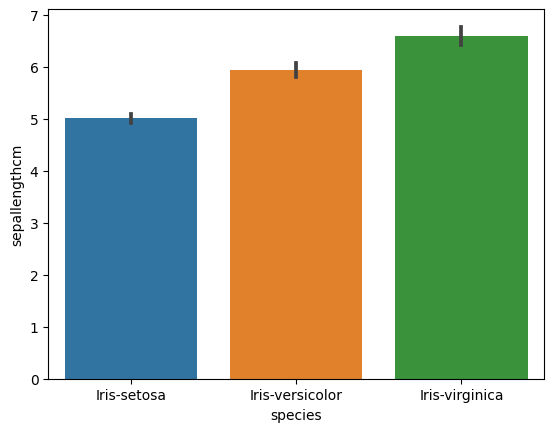

In [89]:
sns.barplot(x = df['species'], y = df['sepallengthcm']) #Plot a barplot of species vs sepal length

<Axes: xlabel='species', ylabel='sepalwidthcm'>

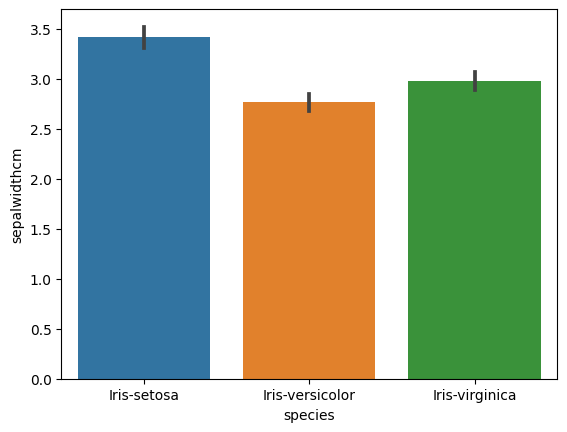

In [90]:
sns.barplot(x = df['species'], y = df['sepalwidthcm']) #Plot a barplot of species vs sepal width

<Axes: xlabel='species', ylabel='petallengthcm'>

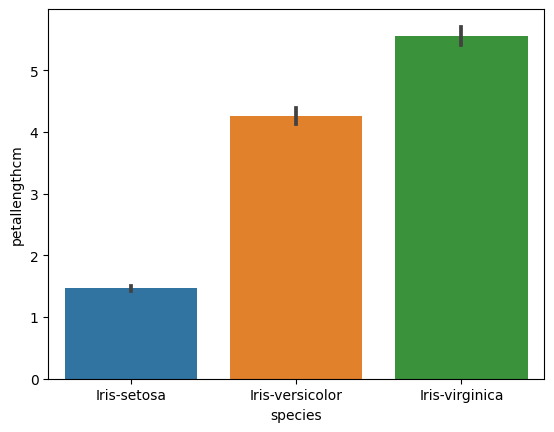

In [91]:
sns.barplot(x = df['species'], y = df['petallengthcm']) #Plot a barplot of species vs petal length

<Axes: xlabel='species', ylabel='petalwidthcm'>

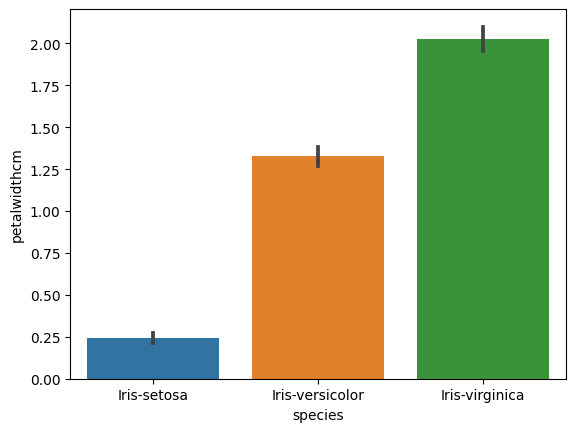

In [92]:
sns.barplot(x = df['species'], y = df['petalwidthcm']) #Plot a barplot of species vs petal width

### Heat Map
A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

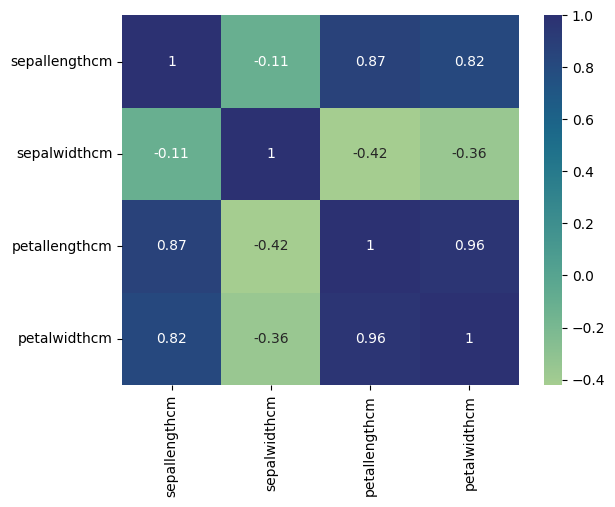

In [93]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True) #Plot a heatmap of the correlation between numeric variables

### Pair Plot
A pair plot is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value.

c:\Users\EliteBook\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


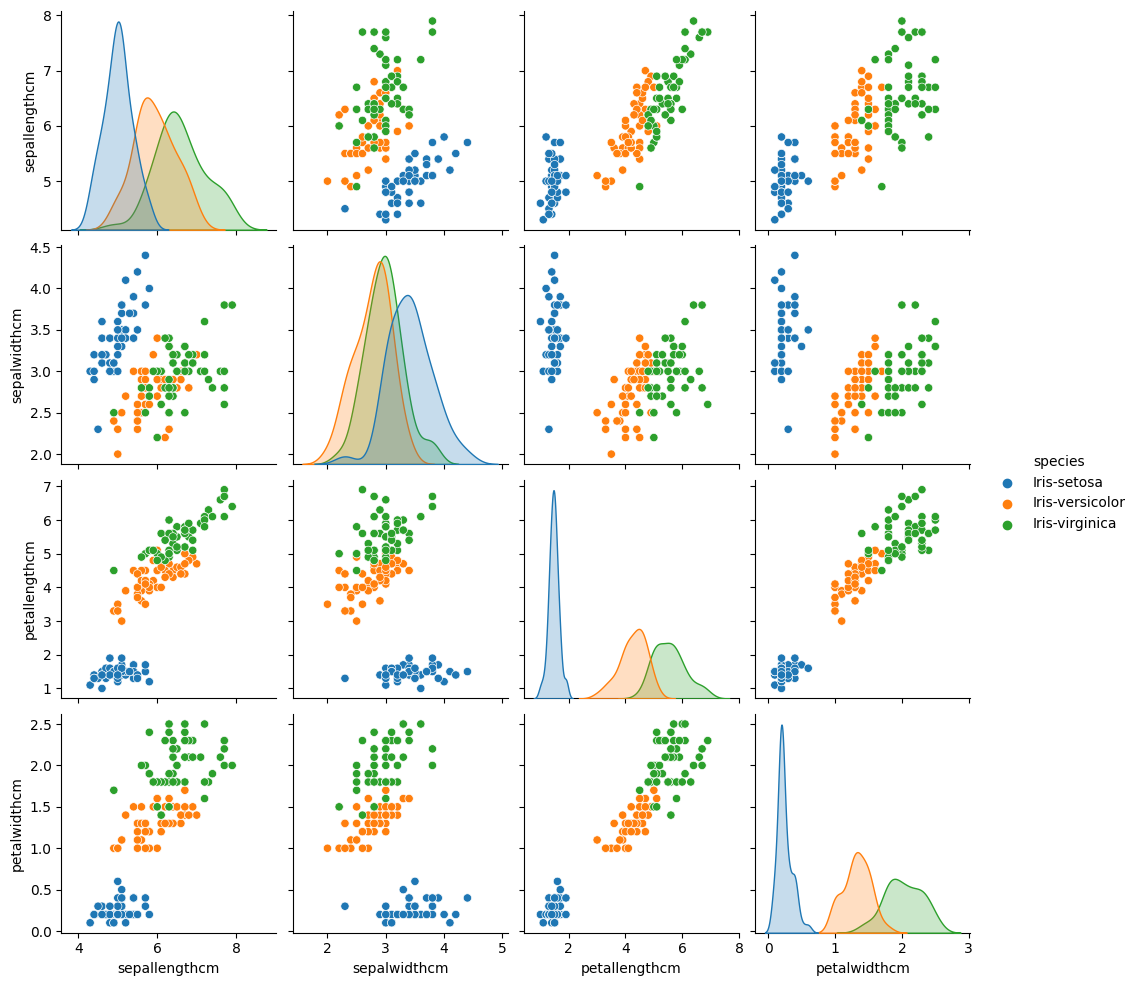

In [94]:
sns.pairplot(df, hue = 'species') #Plot a pairplot of the dataframe

## Data Splitting
Data splitting is a technique to split the data into two parts: training data and testing data. The training data is used to train the model, whereas the testing data is used to test the model.

In [95]:
X = df.drop(['species'], axis=1) #Drop the target variable
y = df['species'] #Store the target variable in a separate variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the dataset into train and test sets

In [96]:
len(X_train), len(X_test) #Check the length of the train and test sets

(120, 30)

## Decision Tree
A decision tree is a supervised machine learning algorithm that is used for classification and regression problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules, and each leaf node represents the outcome.

In [97]:
dt = DecisionTreeClassifier(max_depth=2) #Create an instance of the model
dt.fit(X_train, y_train) #Fit the model on the training data

DecisionTreeClassifier(max_depth=2)

In [98]:
prediction = dt.predict(X_test) #Make predictions on the test data
print("The accuracy of the Decision Tree is: ", dt.score(X_test, y_test)*100, "%") #Print the accuracy of the model

The accuracy of the Decision Tree is:  96.66666666666667 %
